In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [5]:
file_path = "/Users/akshaypulla/Desktop/Proj/final_inflow_rainfall_merged.csv"

df = pd.read_csv(file_path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              2191 non-null   object 
 1   Inflows in last 24 Hrs. in Mcft.  2191 non-null   float64
 2   17.75_77.5                        2191 non-null   float64
 3   18.0_77.5                         2191 non-null   float64
 4   18.5_76.0                         2191 non-null   float64
 5   18.25_77.0                        2191 non-null   float64
 6   18.25_76.5                        2191 non-null   float64
 7   18.75_75.75                       2191 non-null   float64
 8   18.5_76.75                        2191 non-null   float64
 9   18.75_76.25                       2191 non-null   float64
 10  18.0_77.25                        2191 non-null   float64
 11  17.75_77.25                       2191 non-null   float64
 12  18.0_7

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

Text(0, 0.5, 'Inflow')

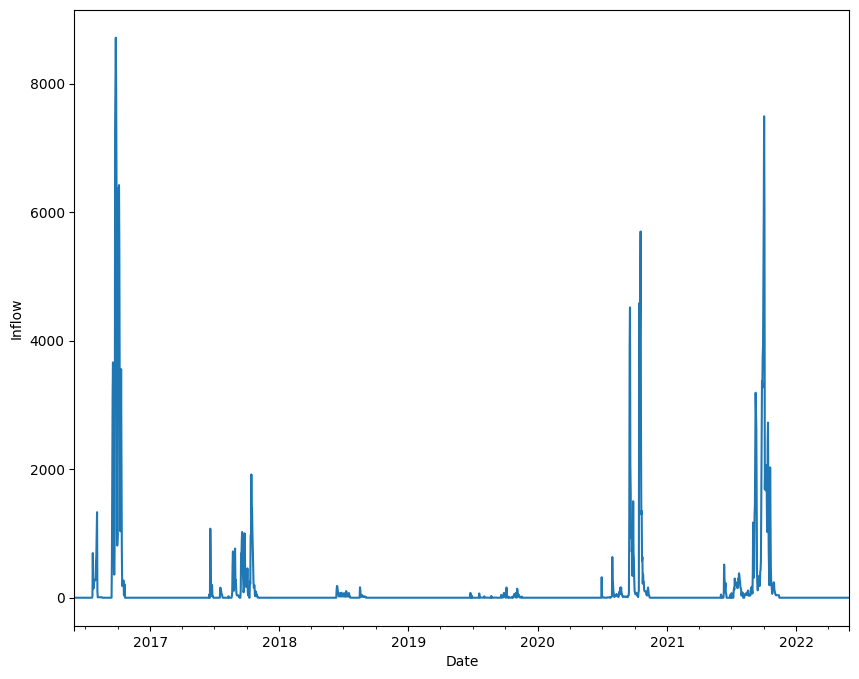

In [8]:
df.set_index('Date')['Inflows in last 24 Hrs. in Mcft.'].plot()
plt.ylabel("Inflow")

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

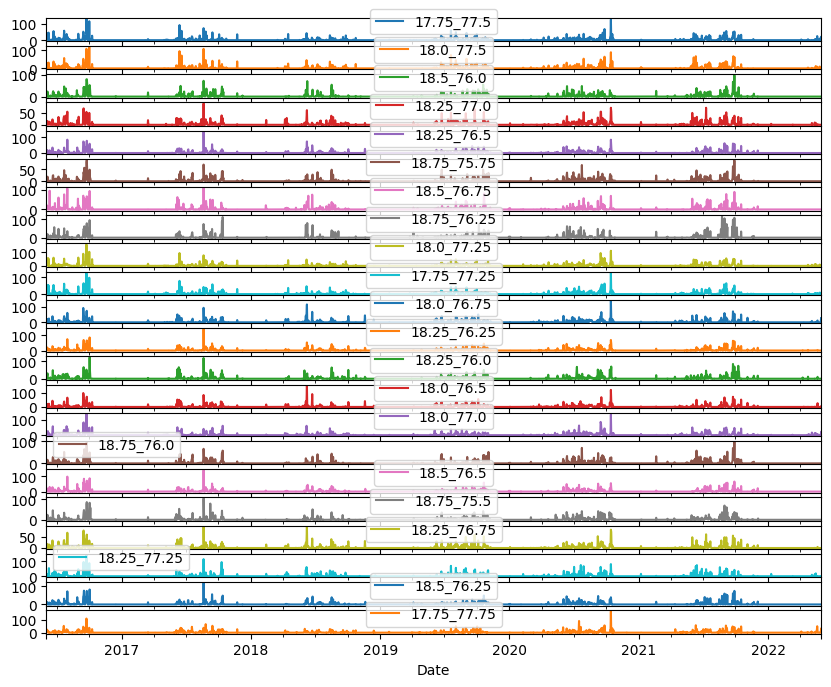

In [9]:
df.set_index('Date')[df.columns[2:]].plot(subplots = True)


In [10]:
data_input = df[df.columns[1:]]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_input)
data_scaled[:1]

array([[0.        , 0.01033966, 0.00672383, 0.        , 0.00146957,
        0.00815159, 0.        , 0.        , 0.        , 0.00840686,
        0.00990804, 0.02166268, 0.00438057, 0.        , 0.02267161,
        0.00742032, 0.        , 0.        , 0.        , 0.01146164,
        0.        , 0.        , 0.00474871]])

In [11]:
features  = data_scaled
target = data_scaled[:,0]


In [12]:
features[0:5]

array([[0.        , 0.01033966, 0.00672383, 0.        , 0.00146957,
        0.00815159, 0.        , 0.        , 0.        , 0.00840686,
        0.00990804, 0.02166268, 0.00438057, 0.        , 0.02267161,
        0.00742032, 0.        , 0.        , 0.        , 0.01146164,
        0.        , 0.        , 0.00474871],
       [0.        , 0.        , 0.        , 0.        , 0.00146957,
        0.00815159, 0.        , 0.        , 0.        , 0.        ,
        0.00089707, 0.01427186, 0.00438057, 0.        , 0.01198183,
        0.00230261, 0.        , 0.        , 0.        , 0.01146164,
        0.        , 0.        , 0.00809854],
       [0.        , 0.02258938, 0.01258156, 0.0014802 , 0.0485126 ,
        0.00417922, 0.        , 0.00472427, 0.01705728, 0.01587495,
        0.01874529, 0.        , 0.01755768, 0.06356695, 0.00178152,
        0.00291832, 0.        , 0.        , 0.00944482, 0.05260182,
        0.07204914, 0.00464897, 0.02024335],
       [0.        , 0.06932783, 0.04996891, 0.035

In [13]:
target[0:5]

array([0., 0., 0., 0., 0.])

In [14]:
ts_generator = TimeseriesGenerator(features, target, length = 5, sampling_rate = 1, batch_size=1)

In [15]:
ts_generator[0]

(array([[[0.        , 0.01033966, 0.00672383, 0.        , 0.00146957,
          0.00815159, 0.        , 0.        , 0.        , 0.00840686,
          0.00990804, 0.02166268, 0.00438057, 0.        , 0.02267161,
          0.00742032, 0.        , 0.        , 0.        , 0.01146164,
          0.        , 0.        , 0.00474871],
         [0.        , 0.        , 0.        , 0.        , 0.00146957,
          0.00815159, 0.        , 0.        , 0.        , 0.        ,
          0.00089707, 0.01427186, 0.00438057, 0.        , 0.01198183,
          0.00230261, 0.        , 0.        , 0.        , 0.01146164,
          0.        , 0.        , 0.00809854],
         [0.        , 0.02258938, 0.01258156, 0.0014802 , 0.0485126 ,
          0.00417922, 0.        , 0.00472427, 0.01705728, 0.01587495,
          0.01874529, 0.        , 0.01755768, 0.06356695, 0.00178152,
          0.00291832, 0.        , 0.        , 0.00944482, 0.05260182,
          0.07204914, 0.00464897, 0.02024335],
         [0.       

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 123, shuffle =False)

In [17]:
x_train.shape

(1752, 23)

In [18]:
x_test.shape

(439, 23)

In [19]:
win_length = 5
batch_size = 32
num_features = 23
train_generator = TimeseriesGenerator(x_train, y_train, length = win_length, sampling_rate = 1, batch_size = batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length = win_length, sampling_rate = 1, batch_size = batch_size)

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(win_length, num_features)))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(negative_slope=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(negative_slope=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 128)         │        77,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,881 (1011.25 KB)

 Trainable params: 258,881 (1011.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min',restore_best_weights=True)

model.compile(loss = tf.losses.MeanSquaredError(),
              optimizer = tf.optimizers.Adam(),
              metrics  = [tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator, epochs = 50,
                              validation_data = test_generator,
                              shuffle = False,
                              callbacks = [early_stopping])

Epoch 1/50
23/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0471   

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0346 - val_loss: 0.0063 - val_mean_absolute_error: 0.0336
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0084 - mean_absolute_error: 0.0377 - val_loss: 0.0061 - val_mean_absolute_error: 0.0290
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0078 - mean_absolute_error: 0.0338 - val_loss: 0.0054 - val_mean_absolute_error: 0.0273
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0068 - mean_absolute_error: 0.0320 - val_loss: 0.0050 - val_mean_absolute_error: 0.0254
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0059 - mean_absolute_error: 0.0299 - val_loss: 0.0044 - val_mean_absolute_error: 0.0233
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0047 - mean_absolute_error: 0.0263 - val_loss: 0.0046 - val_mean_absolute_error: 0.0219
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0043 - mean_absolute_error: 0.0246 - val_loss: 0.0041 - v

In [23]:
model.evaluate(test_generator, verbose=0)

[0.003386222990229726, 0.016818249598145485]

In [24]:
predictions = model.predict(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [25]:
predictions.shape[0]

434

In [26]:
predictions


array([[-5.2917376e-04],
       [-7.3379464e-04],
       [-1.1486998e-03],
       [-1.4271662e-03],
       [-1.7910013e-03],
       [-5.1687006e-04],
       [-5.6581572e-04],
       [-6.9344696e-04],
       [-6.9344696e-04],
       [-6.9344696e-04],
       [-6.9344696e-04],
       [-6.9344696e-04],
       [-6.9344696e-04],
       [-6.9344696e-04],
       [-6.9344696e-04],
       [-6.9344696e-04],
       [-6.9344696e-04],
       [-6.3980836e-04],
       [-5.8345962e-04],
       [-3.0239765e-04],
       [-3.6112312e-04],
       [-2.3617037e-04],
       [ 1.3772156e-03],
       [ 2.4903552e-03],
       [ 3.2571796e-03],
       [ 2.3549572e-03],
       [ 1.4130836e-03],
       [-1.3120193e-04],
       [-6.3349586e-04],
       [-5.9588440e-04],
       [-5.9307460e-04],
       [-6.1360095e-04],
       [-6.3112285e-04],
       [-6.6861790e-04],
       [-2.7560722e-04],
       [-2.4894997e-04],
       [ 5.7846215e-04],
       [ 8.9616980e-04],
       [ 7.8974385e-04],
       [ 1.5640790e-03],


In [27]:
y_test

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
x_test[:,1:][win_length:]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00306587, 0.00305606, 0.        , ..., 0.00127822, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02264445, 0.02118656, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14834513, 0.02623675, 0.        , ..., 0.        , 0.        ,
        0.18244818]])

In [29]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])], axis =1)

In [30]:
rev_trans = scaler.inverse_transform(df_pred)
rev_trans

array([[ -4.61059573,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -6.39342065,   0.4008    ,   0.3652    , ...,   0.1837    ,
          0.        ,   0.        ],
       [-10.00841444,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 22.54561482,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 24.6209006 ,   2.9603    ,   2.5318    , ...,   0.        ,
          0.        ,   0.        ],
       [ 24.59266233,  19.3931    ,   3.1353    , ...,   0.        ,
          0.        ,  30.3369    ]])

In [31]:
df_final = data_input[predictions.shape[0]*-1:]

In [32]:
df_final.count()

Inflows in last 24 Hrs. in Mcft.    434
17.75_77.5                          434
18.0_77.5                           434
18.5_76.0                           434
18.25_77.0                          434
18.25_76.5                          434
18.75_75.75                         434
18.5_76.75                          434
18.75_76.25                         434
18.0_77.25                          434
17.75_77.25                         434
18.0_76.75                          434
18.25_76.25                         434
18.25_76.0                          434
18.0_76.5                           434
18.0_77.0                           434
18.75_76.0                          434
18.5_76.5                           434
18.75_75.5                          434
18.25_76.75                         434
18.25_77.25                         434
18.5_76.25                          434
17.75_77.75                         434
dtype: int64

In [33]:
df_final['Inflow_pred'] = rev_trans[:,0]
df_final

/var/folders/w2/77td4lbs7ms9gjcfvhwnp6pm0000gn/T/ipykernel_30982/388177212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Inflow_pred'] = rev_trans[:,0]


,Inflows in last 24 Hrs. in Mcft.,17.75_77.5,18.0_77.5,18.5_76.0,18.25_77.0,18.25_76.5,18.75_75.75,18.5_76.75,18.75_76.25,18.0_77.25,...,18.0_76.5,18.0_77.0,18.75_76.0,18.5_76.5,18.75_75.5,18.25_76.75,18.25_77.25,18.5_76.25,17.75_77.75,Inflow_pred
1757,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,-4.610596
1758,0.0,0.4008,0.3652,0.0,0.2533,0.0,0.0,0.0,0.0,0.7422,...,0.0000,0.4189,0.0,0.0,0.0,0.0000,0.1837,0.0,0.0000,-6.393421
1759,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,-10.008414
1760,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,-12.434642
1761,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,-15.604672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,0.0,9.5771,10.2412,0.0,0.5828,0.0,0.0,0.0,0.0,9.8275,...,0.0000,1.1378,0.0,0.0,0.0,0.1771,0.2857,0.0,1.6410,-2.659777
2187,0.0,0.0000,0.4808,0.0,0.0000,0.0,0.0,0.0,0.0,0.1257,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,12.338725
2188,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,22.545615
2189,0.0,2.9603,2.5318,0.0,0.0000,0.0,0.0,0.0,0.0,4.3873,...,0.0000,0.7115,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,24.620901


Text(0.5, 1.0, 'LSTM')

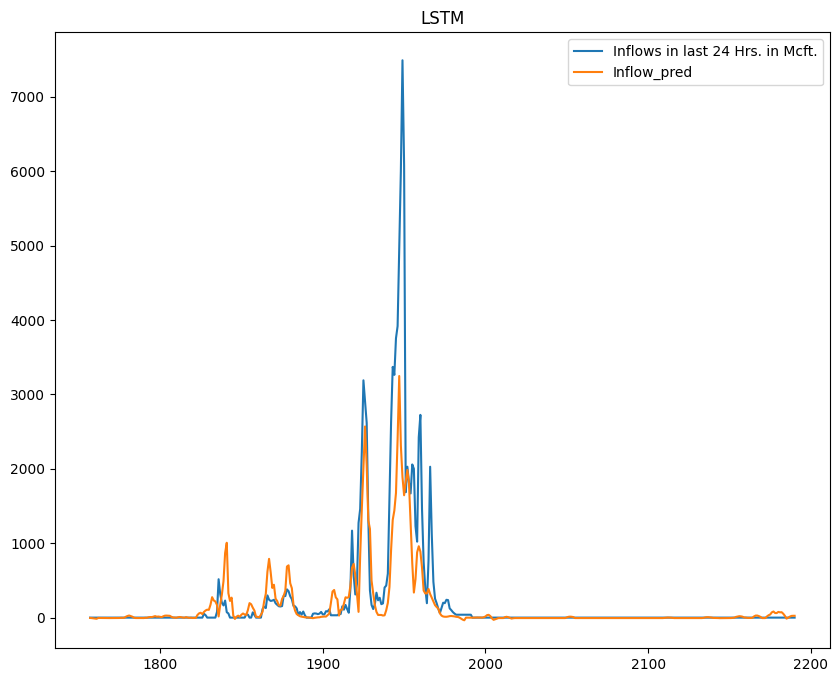

In [34]:
df_final[['Inflows in last 24 Hrs. in Mcft.','Inflow_pred']].plot()
plt.title("LSTM")

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, Dropout, BatchNormalization

model2 = Sequential([
    Input(shape=(win_length, num_features)),
    Conv1D(128, 3, activation='relu', padding='causal'),
    BatchNormalization(),
    Conv1D(128, 3, activation='relu', padding='causal'),
    Dropout(0.3),
    Conv1D(64, 3, activation='relu', padding='causal'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 5, 128)         │         8,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 5, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 5, 128)         │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 5, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,609 (486.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 256 (1.00 KB)

In [36]:
early_stopping2 = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min',restore_best_weights=True)

model2.compile(loss = tf.losses.MeanSquaredError(),
              optimizer = tf.optimizers.Adam(),
              metrics  = [tf.metrics.MeanAbsoluteError()])

history = model2.fit(train_generator, epochs = 50,
                              validation_data = test_generator,
                              shuffle = False,
                              callbacks = [early_stopping2])

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0914 - mean_absolute_error: 0.1629 - val_loss: 0.0084 - val_mean_absolute_error: 0.0262
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146 - mean_absolute_error: 0.0505 - val_loss: 0.0091 - val_mean_absolute_error: 0.0271
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109 - mean_absolute_error: 0.0405 - val_loss: 0.0092 - val_mean_absolute_error: 0.0281


In [37]:
model2.evaluate(test_generator, verbose=0)

[0.008439243771135807, 0.02620161883533001]

In [38]:
predictions2 = model2.predict(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [39]:
df_pred2 = pd.concat([pd.DataFrame(predictions2), pd.DataFrame(x_test[:,1:][win_length:])], axis =1)

In [40]:
rev_trans2 = scaler.inverse_transform(df_pred2)
rev_trans2

array([[14.44459726,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [13.6559147 ,  0.4008    ,  0.3652    , ...,  0.1837    ,
         0.        ,  0.        ],
       [14.54319691,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [14.18377767,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [14.35174771,  2.9603    ,  2.5318    , ...,  0.        ,
         0.        ,  0.        ],
       [14.6048951 , 19.3931    ,  3.1353    , ...,  0.        ,
         0.        , 30.3369    ]])

In [41]:
df_final2 = data_input[predictions2.shape[0]*-1:]
df_final2

,Inflows in last 24 Hrs. in Mcft.,17.75_77.5,18.0_77.5,18.5_76.0,18.25_77.0,18.25_76.5,18.75_75.75,18.5_76.75,18.75_76.25,18.0_77.25,...,18.25_76.0,18.0_76.5,18.0_77.0,18.75_76.0,18.5_76.5,18.75_75.5,18.25_76.75,18.25_77.25,18.5_76.25,17.75_77.75
1757,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000
1758,0.0,0.4008,0.3652,0.0,0.2533,0.0,0.0,0.0,0.0,0.7422,...,0.0,0.0000,0.4189,0.0,0.0,0.0,0.0000,0.1837,0.0,0.0000
1759,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000
1760,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000
1761,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,0.0,9.5771,10.2412,0.0,0.5828,0.0,0.0,0.0,0.0,9.8275,...,0.0,0.0000,1.1378,0.0,0.0,0.0,0.1771,0.2857,0.0,1.6410
2187,0.0,0.0000,0.4808,0.0,0.0000,0.0,0.0,0.0,0.0,0.1257,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000
2188,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000
2189,0.0,2.9603,2.5318,0.0,0.0000,0.0,0.0,0.0,0.0,4.3873,...,0.0,0.0000,0.7115,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000


In [42]:
df_final2['Inflow_pred'] = rev_trans2[:,0]
df_final2

/var/folders/w2/77td4lbs7ms9gjcfvhwnp6pm0000gn/T/ipykernel_30982/4283369452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2['Inflow_pred'] = rev_trans2[:,0]


,Inflows in last 24 Hrs. in Mcft.,17.75_77.5,18.0_77.5,18.5_76.0,18.25_77.0,18.25_76.5,18.75_75.75,18.5_76.75,18.75_76.25,18.0_77.25,...,18.0_76.5,18.0_77.0,18.75_76.0,18.5_76.5,18.75_75.5,18.25_76.75,18.25_77.25,18.5_76.25,17.75_77.75,Inflow_pred
1757,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,14.444597
1758,0.0,0.4008,0.3652,0.0,0.2533,0.0,0.0,0.0,0.0,0.7422,...,0.0000,0.4189,0.0,0.0,0.0,0.0000,0.1837,0.0,0.0000,13.655915
1759,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,14.543197
1760,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,13.744914
1761,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,14.052977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,0.0,9.5771,10.2412,0.0,0.5828,0.0,0.0,0.0,0.0,9.8275,...,0.0000,1.1378,0.0,0.0,0.0,0.1771,0.2857,0.0,1.6410,14.132083
2187,0.0,0.0000,0.4808,0.0,0.0000,0.0,0.0,0.0,0.0,0.1257,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,14.177262
2188,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,14.183778
2189,0.0,2.9603,2.5318,0.0,0.0000,0.0,0.0,0.0,0.0,4.3873,...,0.0000,0.7115,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,14.351748


Text(0.5, 1.0, '1D-CNN')

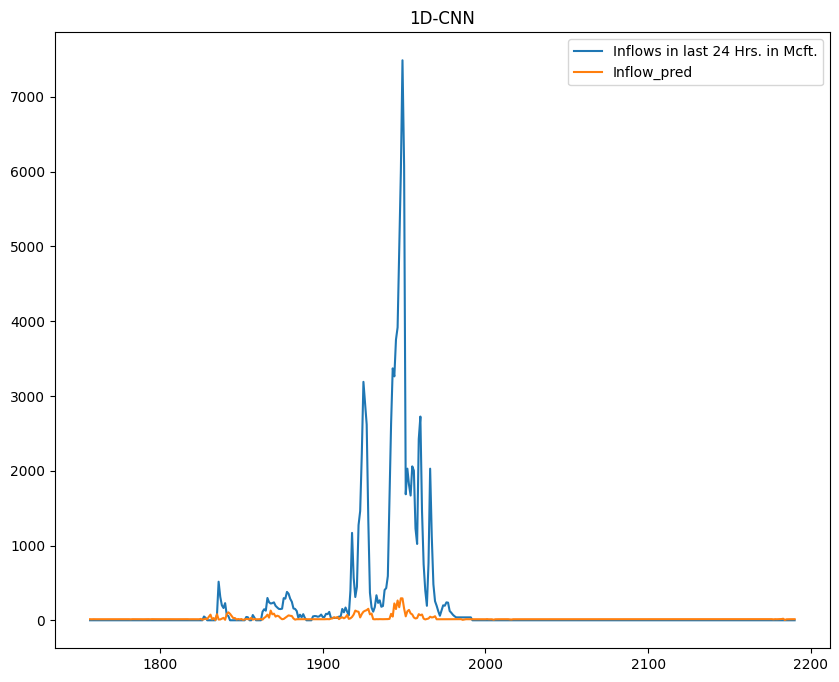

In [43]:
df_final2[['Inflows in last 24 Hrs. in Mcft.','Inflow_pred']].plot()
plt.title("1D-CNN")

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, Dense, Dropout, LeakyReLU

model3 = Sequential([
    Input(shape=(win_length, num_features)),
    GRU(128, return_sequences=True),
    LeakyReLU(negative_slope=0.5),
    GRU(128, return_sequences=True),
    LeakyReLU(negative_slope=0.5),
    Dropout(0.3),
    GRU(64, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])

model3.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae']
)

model3.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 5, 128)         │        58,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 5, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 195,137 (762.25 KB)

 Trainable params: 195,137 (762.25 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
early_stopping3 = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min',restore_best_weights=True)

model3.compile(loss = tf.losses.MeanSquaredError(),
              optimizer = tf.optimizers.Adam(),
              metrics  = [tf.metrics.MeanAbsoluteError()])

history = model3.fit(train_generator, epochs = 50,
                              validation_data = test_generator,
                              shuffle = False,
                              callbacks = [early_stopping3])

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0101 - mean_absolute_error: 0.0478 - val_loss: 0.0051 - val_mean_absolute_error: 0.0355
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0073 - mean_absolute_error: 0.0427 - val_loss: 0.0048 - val_mean_absolute_error: 0.0291
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0064 - mean_absolute_error: 0.0390 - val_loss: 0.0043 - val_mean_absolute_error: 0.0245
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0055 - mean_absolute_error: 0.0342 - val_loss: 0.0035 - val_mean_absolute_error: 0.0241
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045 - mean_absolute_error: 0.0319 - val_loss: 0.0031 - val_mean_absolute_error: 0.0226
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0272 - val_loss: 0.0030 - val_mean_absolute_error: 0.0213
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026 - mean_absolute_error: 0.0233 - val_loss: 

In [46]:
model3.evaluate(test_generator, verbose=0)

[0.0026110284961760044, 0.021875880658626556]

In [47]:
predictions3 = model3.predict(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [48]:
df_pred3 = pd.concat([pd.DataFrame(predictions3), pd.DataFrame(x_test[:,1:][win_length:])], axis =1)

In [49]:
rev_trans3 = scaler.inverse_transform(df_pred3)
rev_trans3

array([[ 88.08863199,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 84.67291277,   0.4008    ,   0.3652    , ...,   0.1837    ,
          0.        ,   0.        ],
       [ 82.18168049,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [116.86739904,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [109.26292979,   2.9603    ,   2.5318    , ...,   0.        ,
          0.        ,   0.        ],
       [108.49678814,  19.3931    ,   3.1353    , ...,   0.        ,
          0.        ,  30.3369    ]])

In [50]:
df_final3 = data_input[predictions3.shape[0]*-1:]
df_final3

,Inflows in last 24 Hrs. in Mcft.,17.75_77.5,18.0_77.5,18.5_76.0,18.25_77.0,18.25_76.5,18.75_75.75,18.5_76.75,18.75_76.25,18.0_77.25,...,18.25_76.0,18.0_76.5,18.0_77.0,18.75_76.0,18.5_76.5,18.75_75.5,18.25_76.75,18.25_77.25,18.5_76.25,17.75_77.75
1757,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000
1758,0.0,0.4008,0.3652,0.0,0.2533,0.0,0.0,0.0,0.0,0.7422,...,0.0,0.0000,0.4189,0.0,0.0,0.0,0.0000,0.1837,0.0,0.0000
1759,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000
1760,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000
1761,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,0.0,9.5771,10.2412,0.0,0.5828,0.0,0.0,0.0,0.0,9.8275,...,0.0,0.0000,1.1378,0.0,0.0,0.0,0.1771,0.2857,0.0,1.6410
2187,0.0,0.0000,0.4808,0.0,0.0000,0.0,0.0,0.0,0.0,0.1257,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000
2188,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000
2189,0.0,2.9603,2.5318,0.0,0.0000,0.0,0.0,0.0,0.0,4.3873,...,0.0,0.0000,0.7115,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000


In [51]:
df_final3['Inflow_pred'] = rev_trans3[:,0]
df_final3

/var/folders/w2/77td4lbs7ms9gjcfvhwnp6pm0000gn/T/ipykernel_30982/1143206025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final3['Inflow_pred'] = rev_trans3[:,0]


,Inflows in last 24 Hrs. in Mcft.,17.75_77.5,18.0_77.5,18.5_76.0,18.25_77.0,18.25_76.5,18.75_75.75,18.5_76.75,18.75_76.25,18.0_77.25,...,18.0_76.5,18.0_77.0,18.75_76.0,18.5_76.5,18.75_75.5,18.25_76.75,18.25_77.25,18.5_76.25,17.75_77.75,Inflow_pred
1757,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,88.088632
1758,0.0,0.4008,0.3652,0.0,0.2533,0.0,0.0,0.0,0.0,0.7422,...,0.0000,0.4189,0.0,0.0,0.0,0.0000,0.1837,0.0,0.0000,84.672913
1759,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,82.181680
1760,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,81.190809
1761,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,79.997759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,0.0,9.5771,10.2412,0.0,0.5828,0.0,0.0,0.0,0.0,9.8275,...,0.0000,1.1378,0.0,0.0,0.0,0.1771,0.2857,0.0,1.6410,90.102516
2187,0.0,0.0000,0.4808,0.0,0.0000,0.0,0.0,0.0,0.0,0.1257,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,114.104455
2188,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,116.867399
2189,0.0,2.9603,2.5318,0.0,0.0000,0.0,0.0,0.0,0.0,4.3873,...,0.0000,0.7115,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,109.262930


Text(0.5, 1.0, 'Gated Recurent Unit (GRU)')

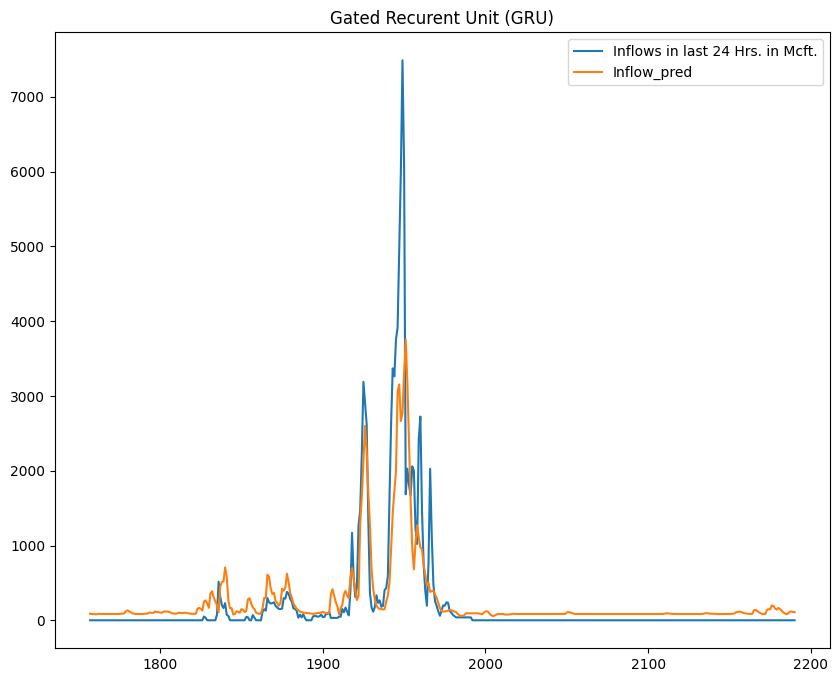

In [52]:
df_final3[['Inflows in last 24 Hrs. in Mcft.','Inflow_pred']].plot()
plt.title("Gated Recurent Unit (GRU)")

/opt/anaconda3/lib/python3.12/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Epoch 1, Loss: 0.005611
Epoch 2, Loss: 0.004949
Epoch 3, Loss: 0.004952
Epoch 4, Loss: 0.004432
Epoch 5, Loss: 0.004435
Epoch 6, Loss: 0.003970
Epoch 7, Loss: 0.002054
Epoch 8, Loss: 0.001656
Epoch 9, Loss: 0.001119
Epoch 10, Loss: 0.001043
Epoch 11, Loss: 0.001065
Epoch 12, Loss: 0.001070
Early stopping triggered at epoch 12


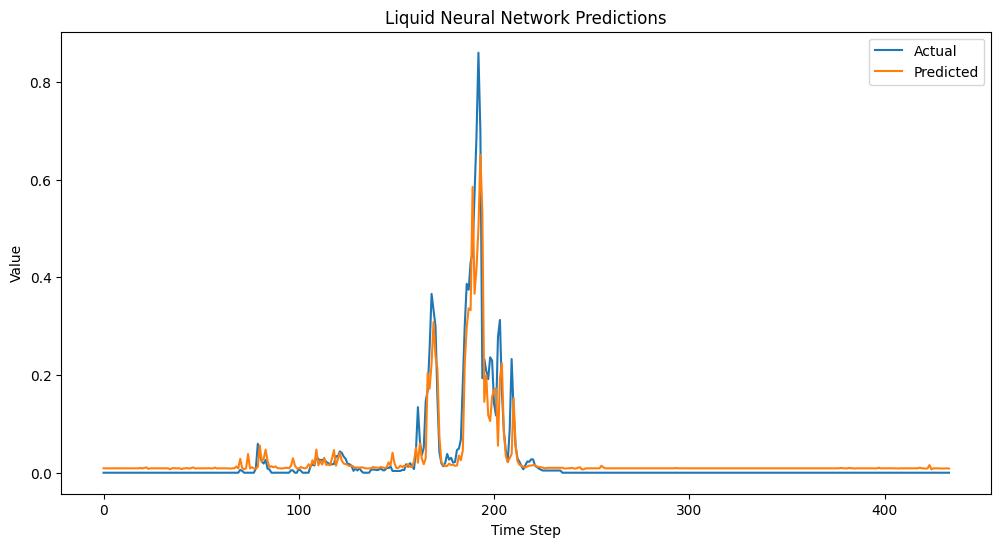

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# Hyperparameters
# ---------------------------
win_length = 5
batch_size = 32
num_features = 23
hidden_size = 128
num_layers = 3
epochs = 50
dt = 0.1
patience = 2
lr = 1e-3

# ---------------------------
# TimeseriesGenerator
# ---------------------------
# x_train, y_train, x_test, y_test are your numpy arrays
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

# ---------------------------
# Convert generator to torch tensors
# ---------------------------
def generator_to_torch(gen):
    data = []
    for i in range(len(gen)):
        x, y = gen[i]
        x_tensor = torch.tensor(x, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32)
        # Ensure labels are 2D
        if y_tensor.ndim == 1:
            y_tensor = y_tensor.unsqueeze(1)
        data.append((x_tensor, y_tensor))
    return data

train_data = generator_to_torch(train_generator)
test_data = generator_to_torch(test_generator)

# ---------------------------
# Liquid Neural Network
# ---------------------------
class LiquidNeuralNetwork(nn.Module):
    def __init__(self, win_length, num_features, hidden_size, num_layers):
        super(LiquidNeuralNetwork, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Hidden layers
        self.layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(num_features if i == 0 else hidden_size, hidden_size),
                nn.LeakyReLU(),
                nn.Linear(hidden_size, hidden_size)
            ) for i in range(num_layers - 1)
        ])
        
        # Final layer outputs num_features to match labels
        self.final_layer = nn.Linear(hidden_size, num_features)
    
    def forward(self, x):
        batch_size, seq_len, features = x.shape
        x = x.view(batch_size * seq_len, features)
        for layer in self.layers:
            x = layer(x)
        x = self.final_layer(x)  # output shape: (batch*seq_len, num_features)
        x = x.view(batch_size, seq_len, -1)
        return x

# ---------------------------
# ODE Solver Wrapper
# ---------------------------
class ODESolver(nn.Module):
    def __init__(self, model, dt=0.1):
        super(ODESolver, self).__init__()
        self.model = model
        self.dt = dt
    
    def forward(self, x):
        return self.model(x)
    
    def loss(self, x, t):
        outputs = self.forward(x)
        outputs_last = outputs[:, -1, :]  # last timestep prediction
        # Ensure labels t match shape
        if t.ndim == 1:
            t = t.unsqueeze(1)
        return ((outputs_last - t) ** 2).mean()

# ---------------------------
# Training function with Early Stopping
# ---------------------------
def train(model, dataset, optimizer, epochs=50, patience=2):
    model.train()
    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        total_loss = 0
        for inputs, labels in dataset:
            optimizer.zero_grad()
            loss = model.loss(inputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        avg_loss = total_loss / len(dataset)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.6f}")
        
        # Early stopping
        if avg_loss < best_loss:
            best_loss = avg_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

# ---------------------------
# Build and train the model
# ---------------------------
lnn = LiquidNeuralNetwork(win_length, num_features, hidden_size, num_layers)
solver = ODESolver(lnn, dt=dt)
optimizer = optim.Adam(solver.parameters(), lr=lr)

train(solver, train_data, optimizer, epochs=epochs, patience=patience)

# ---------------------------
# Test / Predict
# ---------------------------
solver.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for inputs, labels in test_data:
        preds = solver(inputs)[:, -1, :]  # last timestep prediction
        all_preds.append(preds)
        all_targets.append(labels)

all_preds = torch.cat(all_preds, dim=0).numpy()
all_targets = torch.cat(all_targets, dim=0).numpy()

# ---------------------------
# Plot predicted vs actual
# ---------------------------
# Average across features for simplicity
pred_flat = all_preds.mean(axis=1)
target_flat = all_targets.mean(axis=1)

df_final2 = pd.DataFrame({
    'Actual': target_flat,
    'Predicted': pred_flat
})

df_final2[['Actual','Predicted']].plot(figsize=(12,6))
plt.title("Liquid Neural Network Predictions")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.show()


In [54]:
df_final2

,Actual,Predicted
0,0.0,0.009089
1,0.0,0.008975
2,0.0,0.008854
3,0.0,0.008975
4,0.0,0.008975
...,...,...
429,0.0,0.008488
430,0.0,0.008697
431,0.0,0.008826
432,0.0,0.008975


/opt/anaconda3/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 23])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/anaconda3/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([19, 1])) that is different to the input size (torch.Size([19, 23])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Loss: 42.434938
Epoch 2, Loss: 32.112610
Epoch 3, Loss: 25.015158
Epoch 4, Loss: 19.709273
Epoch 5, Loss: 15.843070
Epoch 6, Loss: 12.690628
Epoch 7, Loss: 10.660337
Epoch 8, Loss: 8.481262
Epoch 9, Loss: 7.041229
Epoch 10, Loss: 6.074150
Epoch 11, Loss: 5.291126
Epoch 12, Loss: 4.491014
Epoch 13, Loss: 3.994922
Epoch 14, Loss: 3.541813
Epoch 15, Loss: 3.030808
Epoch 16, Loss: 2.667324
Epoch 17, Loss: 2.301823
Epoch 18, Loss: 2.210351
Epoch 19, Loss: 1.975474
Epoch 20, Loss: 1.721932
Epoch 21, Loss: 1.626919
Epoch 22, Loss: 1.445081
Epoch 23, Loss: 1.386344
Epoch 24, Loss: 1.226924
Epoch 25, Loss: 1.084363
Epoch 26, Loss: 0.966911
Epoch 27, Loss: 0.906682
Epoch 28, Loss: 0.870403
Epoch 29, Loss: 0.719247
Epoch 30, Loss: 0.739695
Epoch 31, Loss: 0.701241
Epoch 32, Loss: 0.675964
Epoch 33, Loss: 0.631148
Epoch 34, Loss: 0.528014
Epoch 35, Loss: 0.436480
Epoch 36, Loss: 0.463879
Epoch 37, Loss: 0.434746
Epoch 38, Loss: 0.393139
Epoch 39, Loss: 0.342171
Epoch 40, Loss: 0.325531
Ep

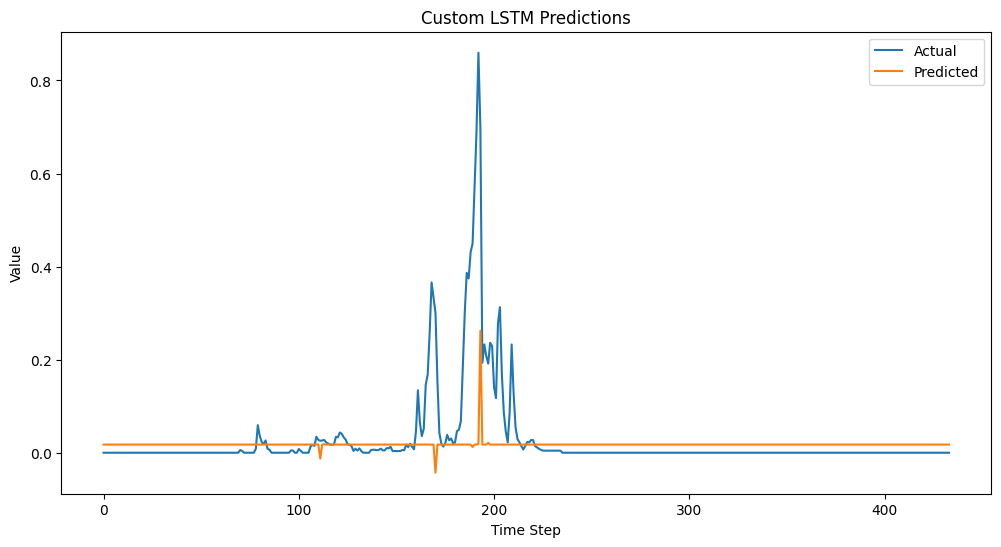

Epoch 1, Loss: 0.006307
Epoch 2, Loss: 0.004689
Epoch 3, Loss: 0.004020
Epoch 4, Loss: 0.003442
Epoch 5, Loss: 0.002322
Epoch 6, Loss: 0.001399
Epoch 7, Loss: 0.001196
Epoch 8, Loss: 0.001484
Epoch 9, Loss: 0.001462
Early stopping triggered at epoch 9


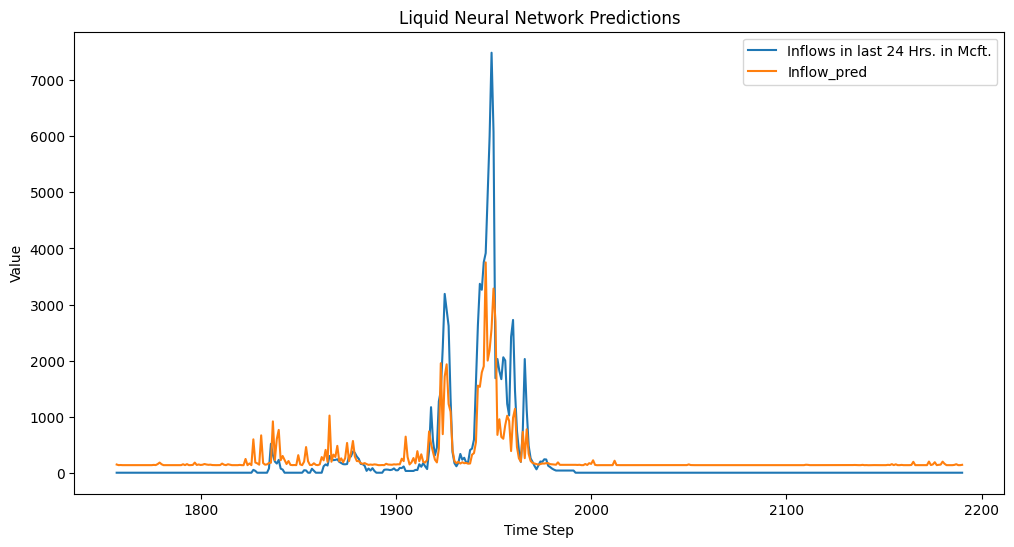

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

# ---------------------------
# Hyperparameters
# ---------------------------
win_length = 5
batch_size = 32
num_features = 23
hidden_size = 128
num_layers = 3
epochs = 50
dt = 0.1
patience = 2
lr = 1e-3

# ---------------------------
# TimeseriesGenerator
# ---------------------------
# x_train, y_train, x_test, y_test are your numpy arrays
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

# ---------------------------
# Convert generator to torch tensors
# ---------------------------
def generator_to_torch(gen):
    data = []
    for i in range(len(gen)):
        x, y = gen[i]
        x_tensor = torch.tensor(x, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32)
        # Ensure labels are 2D
        if y_tensor.ndim == 1:
            y_tensor = y_tensor.unsqueeze(1)
        data.append((x_tensor, y_tensor))
    return data

train_data = generator_to_torch(train_generator)
test_data = generator_to_torch(test_generator)

# ---------------------------
# Liquid Neural Network
# ---------------------------
class LiquidNeuralNetwork(nn.Module):
    def __init__(self, win_length, num_features, hidden_size, num_layers):
        super(LiquidNeuralNetwork, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Hidden layers
        self.layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(num_features if i == 0 else hidden_size, hidden_size),
                nn.LeakyReLU(),
                nn.Linear(hidden_size, hidden_size)
            ) for i in range(num_layers - 1)
        ])

        # Final layer outputs 1 for the predicted inflow
        self.final_layer = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size, seq_len, features = x.shape
        x = x.view(batch_size * seq_len, features)
        for layer in self.layers:
            x = layer(x)
        x = self.final_layer(x)  # output shape: (batch*seq_len, 1)
        x = x.view(batch_size, seq_len, -1)
        return x

# ---------------------------
# ODE Solver Wrapper
# ---------------------------
class ODESolver(nn.Module):
    def __init__(self, model, dt=0.1):
        super(ODESolver, self).__init__()
        self.model = model
        self.dt = dt

    def forward(self, x):
        return self.model(x)

    def loss(self, x, t):
        outputs = self.forward(x)
        outputs_last = outputs[:, -1, :]  # last timestep prediction
        # Ensure labels t match shape
        if t.ndim == 1:
            t = t.unsqueeze(1)
        return ((outputs_last - t) ** 2).mean()

# ---------------------------
# Training function with Early Stopping
# ---------------------------
def train(model, dataset, optimizer, epochs=50, patience=2):
    model.train()
    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        total_loss = 0
        for inputs, labels in dataset:
            optimizer.zero_grad()
            loss = model.loss(inputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(dataset)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.6f}")

        # Early stopping
        if avg_loss < best_loss:
            best_loss = avg_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

# ---------------------------
# Build and train the model
# ---------------------------
lnn = LiquidNeuralNetwork(win_length, num_features, hidden_size, num_layers)
solver = ODESolver(lnn, dt=dt)
optimizer = optim.Adam(solver.parameters(), lr=lr)

train(solver, train_data, optimizer, epochs=epochs, patience=patience)

# ---------------------------
# Test / Predict
# ---------------------------
solver.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for inputs, labels in test_data:
        preds = solver(inputs)[:, -1, :]  # last timestep prediction
        all_preds.append(preds)
        all_targets.append(labels)

all_preds = torch.cat(all_preds, dim=0).numpy()
all_targets = torch.cat(all_targets, dim=0).numpy()

# ---------------------------
# Plot predicted vs actual
# ---------------------------
# Inverse transform predictions and actual values
rev_trans_lnn = scaler.inverse_transform(np.concatenate([all_preds, x_test[:, 1:][win_length:]], axis=1))
df_final_lnn = data_input[all_preds.shape[0] * -1:].copy()
df_final_lnn['Inflow_pred'] = rev_trans_lnn[:, 0]


df_final_lnn[['Inflows in last 24 Hrs. in Mcft.','Inflow_pred']].plot(figsize=(12,6))
plt.title("Liquid Neural Network Predictions")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.show()

,Actual,Predicted
0,0.030782,0.016642
1,-0.125763,-0.002889
2,0.136536,0.007162
3,-0.061113,0.004736
4,0.006234,-0.019129
...,...,...
1595,-0.009358,0.044683
1596,-0.163369,0.012657
1597,-0.050216,0.014918
1598,0.157725,-0.007719
